<img src="./activities.png" />
<img src="./table_4_2.PNG" />

In [5]:
a_n = [10.3 17.2 27 45.3 80.2 125.3 176.2 255.5 330.8 390.4 ...
        440 520 560.4 600.5 610.8 614.5 618.3 619.5 620 621];

hours = length(a_n)-1;
n = 0:hours;

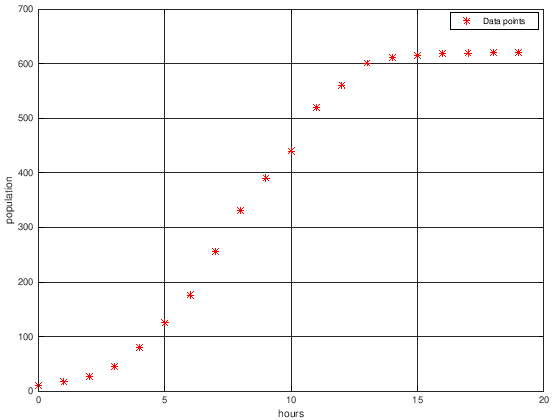

In [6]:
graphics_toolkit("gnuplot");

plot(n, a_n, "*r");
xlabel("hours");
ylabel("population");
legend("Data points");
grid on;

Population for 1st 19 hours is: 619.35

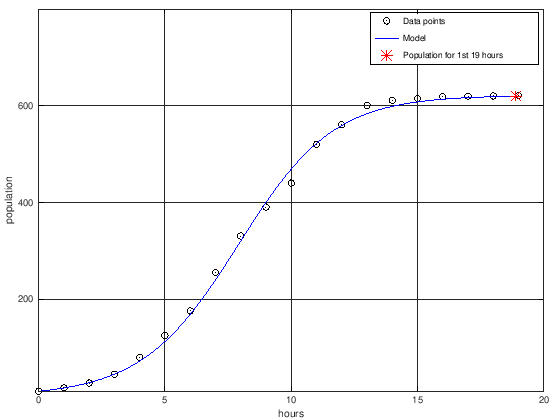

In [4]:
% b : propotionality constant
% c : carrying capacity
% -----------------------------
% a_n_1 = a_n + b*(c-a_n)*a_n

y = a_n(1, 2:hours+1);
x = a_n(1, 1:hours);
c = 621;
numerator = zeros(1, hours);
denominator = zeros(1, hours);
f_logis_x = 0:0.1:hours-0.1;
f_logis_y = zeros(1, hours*10);
f_logis_y(1, 1) = a_n(1, 1);

for i = 1:1:hours,
    numerator = (y(i)-x(i)).*(c-x(i)).*x(i);
    denominator = (x(i).*(c-x(i))).^2;
endfor

% b = [yx((c-x) - x^2(c-x)]/[(x(c-x))^2]
b = sum(numerator)/sum(denominator)/hours; % not a hourly model and plot discrete values therefore divide by no of hours.

for i = 1:1:(hours-0.1)*10,
    f_logis_y(i+1) = f_logis_y(i) + b * (c - f_logis_y(i)) .* f_logis_y(i);
endfor

plot(n, a_n, "oblack", f_logis_x, f_logis_y, "-b", f_logis_x(hours*10), f_logis_y(hours*10), '*r', 'MarkerSize', 10, 'LineWidth', 2);
xlabel("hours");
ylabel("population");
legend("Data points", "Model", "Population for 1st 19 hours");
ylim([min(f_logis_y), max(f_logis_y) + 180]);  % Adds extra vertical space
grid on;

printf("Population for 1st 19 hours is: %.2f", f_logis_y(hours*10));